Quick program showcasing ```attribute_across_filings``` - takes the first 10 companies listed by the SEC and plots an attribute (```PropertyPlantAndEquipmentNet```, in this case) across time

In [1]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt

from edgar_func import attribute_across_filings, get_company_basics, EmptyDataFrameError

In [2]:
#plot style
plt.style.use('ggplot')

# create request header
header = {'User-Agent': "email@address.com"}

In [3]:
data = get_company_basics(user_header=header)

JSON Decode Error for TSM - 0001046179
JSON Decode Error for BRK-B - 0001067983


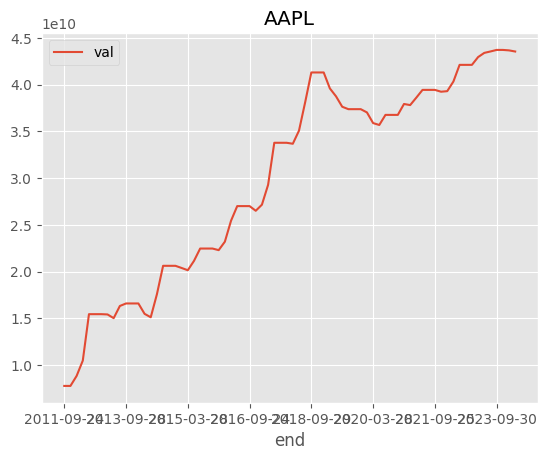

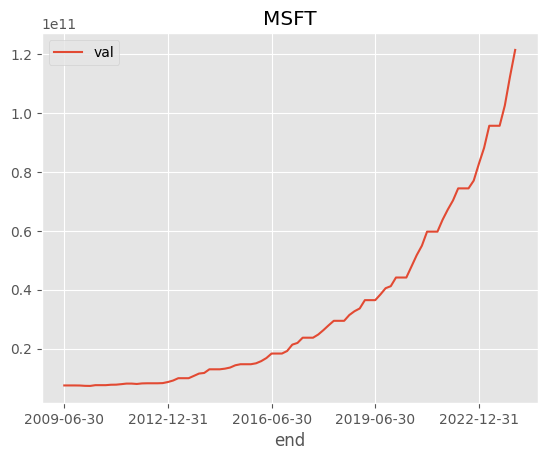

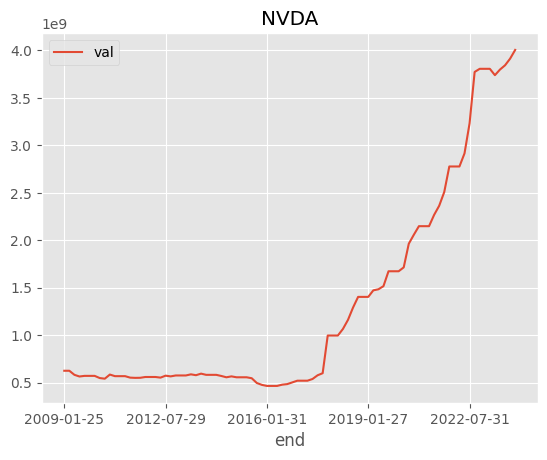

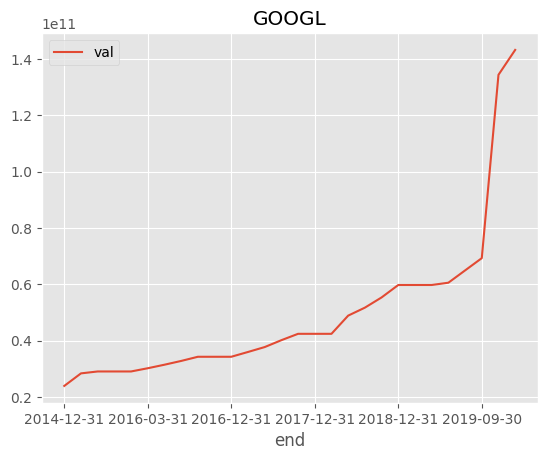

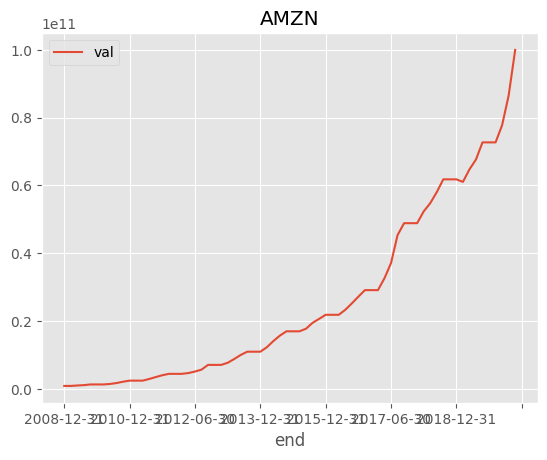

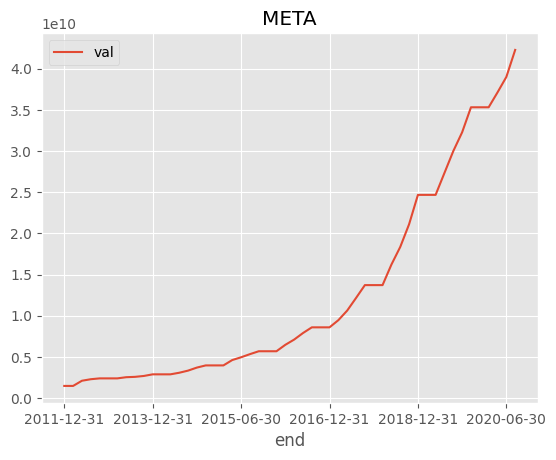

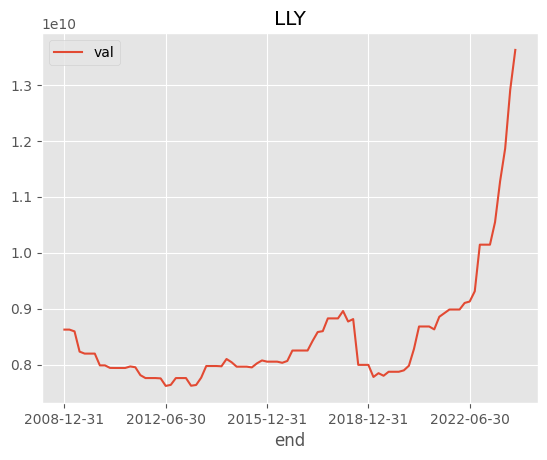

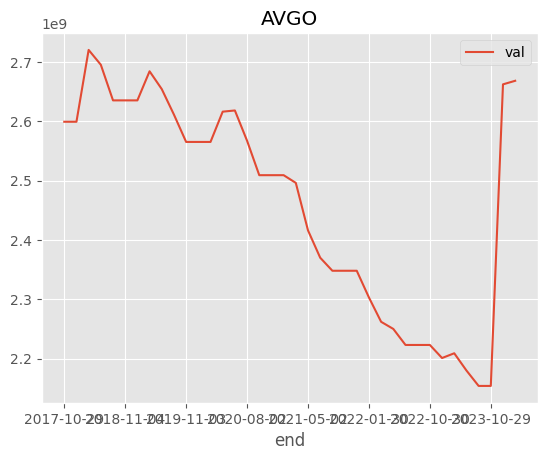

In [4]:
for i in range(10):
    current = data.iloc[i]
    
    try:
        current_cik = current.cik_str

        '''
        'PropertyPlantAndEquipmentNet', 'Revenues', 'AccountsPayable',
        'NetCashProvidedByUsedInOperatingActivities', 
        '''

        current_attribute =  'PropertyPlantAndEquipmentNet'
        
        current_data = attribute_across_filings(cik = current_cik, attribute=current_attribute, form_type='10-Q', user_header= header)

        current_data = current_data.plot(x='end', y='val', title= current.ticker)

    except ValueError:
        print(f"JSON Decode Error for {current.ticker} - {current.cik_str}")
    except KeyError:
        print(f"KeyError for {current.ticker} - {current.cik_str}")
    except EmptyDataFrameError:
        print(f"Empty dataframe {current.ticker} - {current.cik_str}")